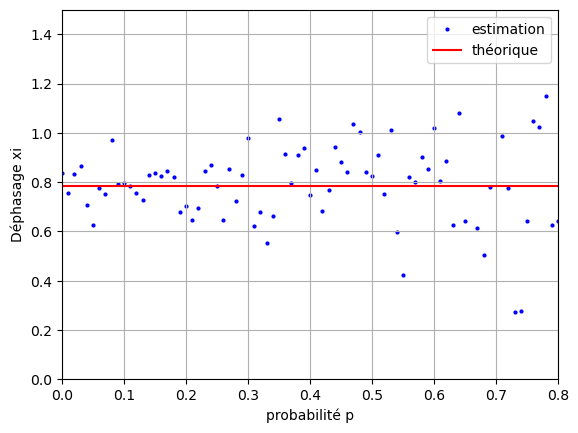

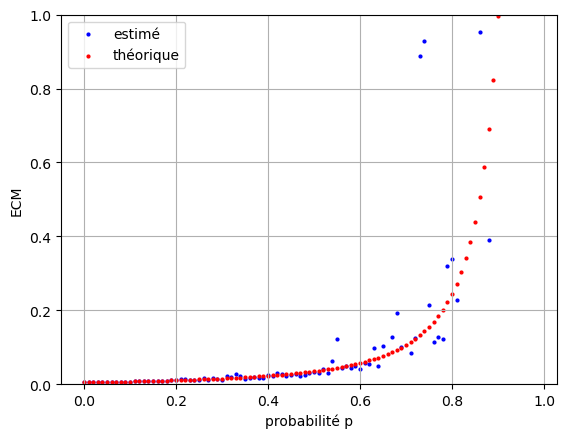

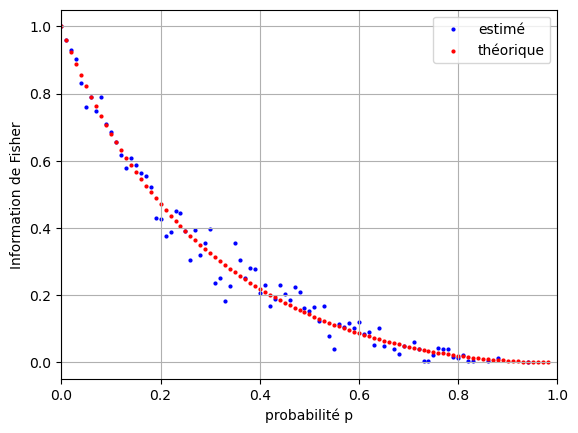

In [5]:
# Affichage des probabilités de |0> et |1> :

import numpy as np
import matplotlib.pyplot as plt

qub = np.loadtxt("estimation.csv", delimiter=",", skiprows=1)

p = qub[:,0]
N0 = qub[:,1]
estimation = qub[:,2]
exact = qub[:,3]
ECM = qub[:,4]
ECM_exact = qub[:,5]
fisher = qub[:,6]
fisher_exact = qub[:,7]


plt.scatter(p , estimation, s=4, c='b', label = 'estimation')
plt.plot(p,exact, c='r', label = 'théorique')
plt.xlim([0,0.8])
plt.ylim([0.,1.5])
plt.xlabel("probabilité p")
plt.ylabel("Déphasage xi")
plt.legend()
plt.grid()
plt.show()

plt.scatter(p , ECM, s=4, c='b', label = 'estimé')
plt.scatter(p , ECM_exact, s=4, c='r', label = 'théorique')
plt.ylim([0,1])
plt.xlabel("probabilité p")
plt.ylabel("ECM")
plt.legend()
plt.grid()
plt.show()

plt.scatter(p , fisher, s=4,c='b', label = 'estimé' )
plt.scatter(p, fisher_exact, s=4, c='r', label = 'théorique')
plt.xlabel("probabilité p")
plt.ylabel("Information de Fisher")
plt.xlim([0,1])
plt.legend()
plt.grid()
plt.show()

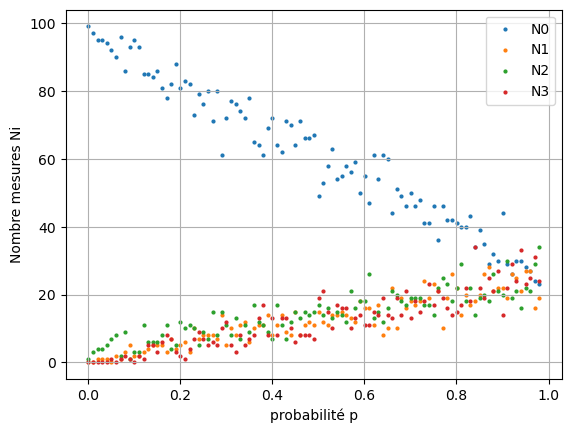

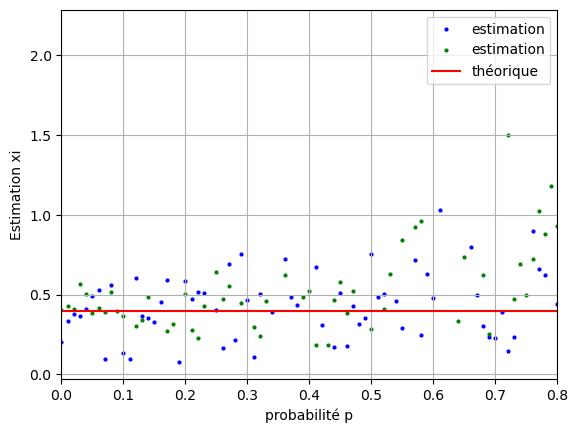

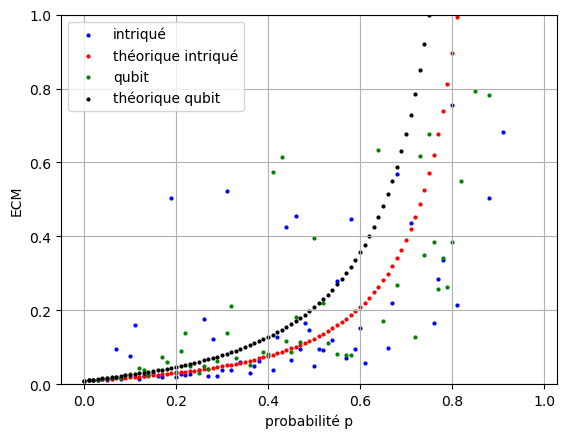

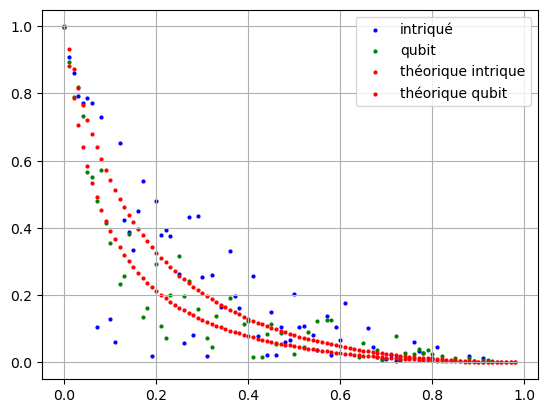

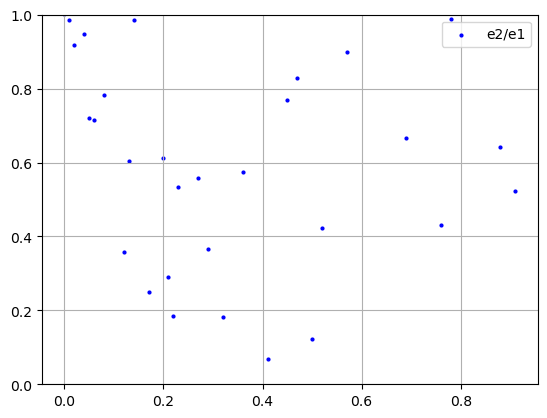

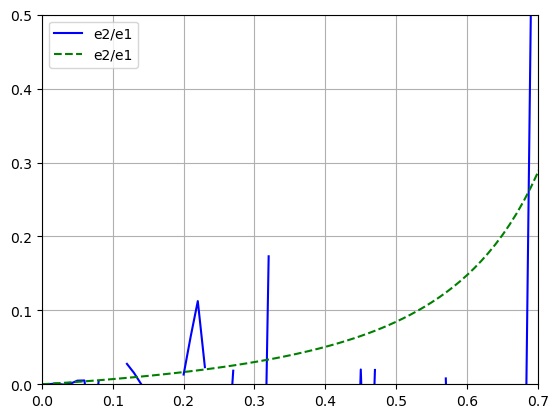

In [3]:
# Affichage des probabilités de |0> et |1> :

import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("intrique.csv", delimiter=" ", skiprows=1)

p = data[:,0]
N0 = data[:,1]
N1 = data[:,2]
N2 = data[:,3]
N3 = data[:,4]
estimation = data[:,5]
xi_exact = data[:,6]
ECM = data[:,7]
ECM_exact = data[:,8]
fisher = data[:,9]
fisher_exact = data[:,10]

plt.scatter(p , N0, s=4, label = "N0")
plt.scatter(p , N1, s=4, label = "N1")
plt.scatter(p , N2, s=4, label = "N2")
plt.scatter(p , N3, s=4, label = "N3")
plt.xlabel("probabilité p")
plt.ylabel("Nombre mesures Ni")
plt.legend()
plt.grid()
plt.show()

plt.scatter(p , estimation, s=4, label = "estimation", c='b')
plt.scatter(p , qub[:,2] , s=4, c='g', label = 'estimation')
plt.plot(p,xi_exact, label = "théorique", c='r')
plt.xlabel("probabilité p")
plt.ylabel("Estimation xi")
plt.xlim([0,0.8])
plt.legend()
plt.grid()
plt.show()

plt.scatter(p , ECM, s=4, label = "intriqué", c='b')
plt.scatter(p, ECM_exact, s=4, label = "théorique intriqué", c='r')
plt.scatter(p , qub[:,4], s=4, label = "qubit", c='g')
plt.scatter(p, qub[:,5], s=4, label = "théorique qubit", c='black')
plt.xlabel("probabilité p")
plt.ylabel("ECM")
plt.ylim([0,1])
plt.legend()
plt.grid()
plt.show()

plt.scatter(p , fisher, s=4, label = "intriqué", c='b')
plt.scatter(p,qub[:,6],s=4,label = 'qubit', c='g')
plt.scatter(p, fisher_exact, s=4, label = "théorique intrique", c='r')
plt.scatter(p, qub[:,7], s=4, label = "théorique qubit", c='r')
plt.legend()
plt.grid()
plt.show()


plt.scatter(p , ECM/qub[:,4], s=4, label = "e2/e1", c='b')
plt.ylim([0,1])
plt.legend()
plt.grid()
plt.show()


plt.plot(p , qub[:,4]-ECM, label = "e2/e1", c='b')
plt.plot(p , qub[:,5]-ECM_exact, label = "e2/e1",linestyle ="--", c='g')
plt.ylim([0,0.5])
plt.xlim([0,0.7])
plt.legend()
plt.grid()
plt.show()




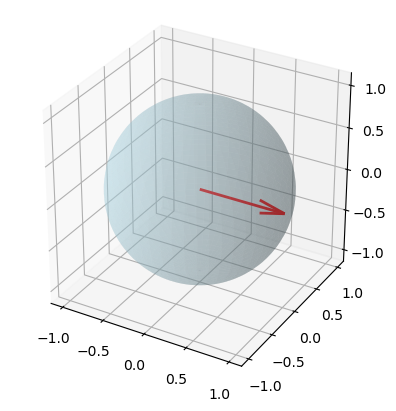

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Charger les données de simulation (assure-toi que ces arrays sont disponibles)
time = np.loadtxt("data.csv", delimiter=" ", skiprows=1, usecols=0)
theta = np.loadtxt("data.csv", delimiter=" ", skiprows=1, usecols=1)
phi = np.loadtxt("data.csv", delimiter=" ", skiprows=1, usecols=2)
P1 = np.loadtxt("data.csv", delimiter=" ", skiprows=1, usecols=3)# Colonne proba de |0> , abs(alpha)
P2 = np.loadtxt("data.csv", delimiter=" ", skiprows=1, usecols=4)# Colonne probab de |1> , abs(beta)

n_frames = len(time)  # Nombre de pas de temps

# Conversion sphériques -> cartésiennes
x = np.sin(theta) * np.cos(phi)
y = np.sin(theta) * np.sin(phi)
z = np.cos(theta)

# Préparation de la figure
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.set_xlim([-1.1, 1.1])
ax.set_ylim([-1.1, 1.1])
ax.set_zlim([-1.1, 1.1])
ax.set_box_aspect([1, 1, 1])

# Ajout d'une sphère pour guider l'animation
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x_sphere = np.outer(np.cos(u), np.sin(v))
y_sphere = np.outer(np.sin(u), np.sin(v))
z_sphere = np.outer(np.ones_like(u), np.cos(v))
ax.plot_surface(x_sphere, y_sphere, z_sphere, color='lightblue', alpha=0.3)

# Initialisation de la flèche (vecteur)
arrow = ax.quiver(0, 0, 0, x[0], y[0], z[0], color='red', linewidth=2)

# Fonction de mise à jour de l'animation
def update(frame):
    arrow.set_segments([[[0, 0, 0], [x[frame], y[frame], z[frame]]]])
    return arrow,

# Création de l'animation
anim = FuncAnimation(fig, update, frames=n_frames, interval=50, blit=False)

# Affichage
plt.show()

# Sauvegarde de l'animation
anim.save("precession_arrow.gif", writer="ffmpeg", fps=60)